In [52]:
# Library
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
df_weather = pd.read_csv('../beb_chargers/data/weather/cleaned_hourly_weather_mar2024.csv')

In [44]:
df_weather = df_weather.rename(columns={'date':'temp_time'})
df_weather.columns

Index(['loc_weather', 'lat', 'lon', 'temp_time', 'year', 'month', 'day',
       'hour', 'minute', 'dew_point_temp', 'temp', 'wet_bulb_temp',
       'precipitation', 'relate_humid', 'sky_cond', 'wind_dir', 'wind_speed'],
      dtype='object')

In [45]:
df = pd.read_csv('../beb_chargers/data/realtime/cleaned_trip_data.csv')

In [46]:
df.columns

Index(['date', 'vehicle_id', 'vehicle_type', 'trip_id', 'route',
       'direction_id', 'start_time', 'end_time', 'duration_sched',
       'duration_rt', 'duration_difference_pct', 'kwh', 'miles', 'kwh_per_mi'],
      dtype='object')

In [47]:
df.iloc[0]['start_time']

'2024-03-01 04:56:00'

In [48]:
df['start_time'] = df['start_time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
df['end_time'] = df['end_time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [71]:
df_w_temp = df.merge(df_weather[['temp_time', 'temp', 'precipitation']], how='cross')
df_w_temp = df_w_temp[(df_w_temp['start_time'] <= df_w_temp['temp_time']) & (df_w_temp['temp_time'] <= df_w_temp['end_time'])]

In [72]:
df_w_temp

,date,vehicle_id,vehicle_type,trip_id,route,direction_id,start_time,end_time,duration_sched,duration_rt,duration_difference_pct,kwh,miles,kwh_per_mi,temp_time,temp,precipitation
900,2024-03-01,4700,40-foot,635433645,181,0,2024-03-01 06:20:00,2024-03-01 07:09:56,3060.0,2996.0,-2.091503,36.324455,14.446880,2.514346,2024-03-01T06:53:00,38.0,T
1794,2024-03-01,4700,40-foot,635433805,181,1,2024-03-01 07:24:00,2024-03-01 08:13:12,3240.0,2952.0,-8.888889,39.440413,14.757566,2.672555,2024-03-01T07:53:00,38.0,0.00
2698,2024-03-01,4700,40-foot,635445855,160,0,2024-03-01 14:52:00,2024-03-01 16:13:55,4800.0,4915.0,2.395833,59.782158,17.553736,3.405666,2024-03-01T14:53:00,40.0,T
2699,2024-03-01,4700,40-foot,635445855,160,0,2024-03-01 14:52:00,2024-03-01 16:13:55,4800.0,4915.0,2.395833,59.782158,17.553736,3.405666,2024-03-01T15:53:00,41.0,T
3593,2024-03-01,4700,40-foot,635445865,160,1,2024-03-01 16:42:21,2024-03-01 17:58:32,4620.0,4571.0,-1.060606,50.411956,17.243051,2.923610,2024-03-01T16:53:00,40.0,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2826213,2024-03-27,4819,60-foot,635434225,193,1,2024-03-27 06:41:18,2024-03-27 08:12:27,4200.0,5469.0,30.214286,74.591861,24.233476,3.078050,2024-03-27T07:53:00,46.0,0.06
2827150,2024-03-28,4819,60-foot,635434155,193,0,2024-03-28 16:39:00,2024-03-28 18:15:03,4680.0,5763.0,23.141026,84.795512,25.165533,3.369510,2024-03-28T16:53:00,53.0,0.00
2827151,2024-03-28,4819,60-foot,635434155,193,0,2024-03-28 16:39:00,2024-03-28 18:15:03,4680.0,5763.0,23.141026,84.795512,25.165533,3.369510,2024-03-28T17:53:00,53.0,0.00
2828066,2024-03-29,4819,60-foot,635434135,193,0,2024-03-29 15:39:26,2024-03-29 17:02:31,4860.0,4985.0,2.572016,62.710651,24.621833,2.546953,2024-03-29T15:53:00,58.0,0.00


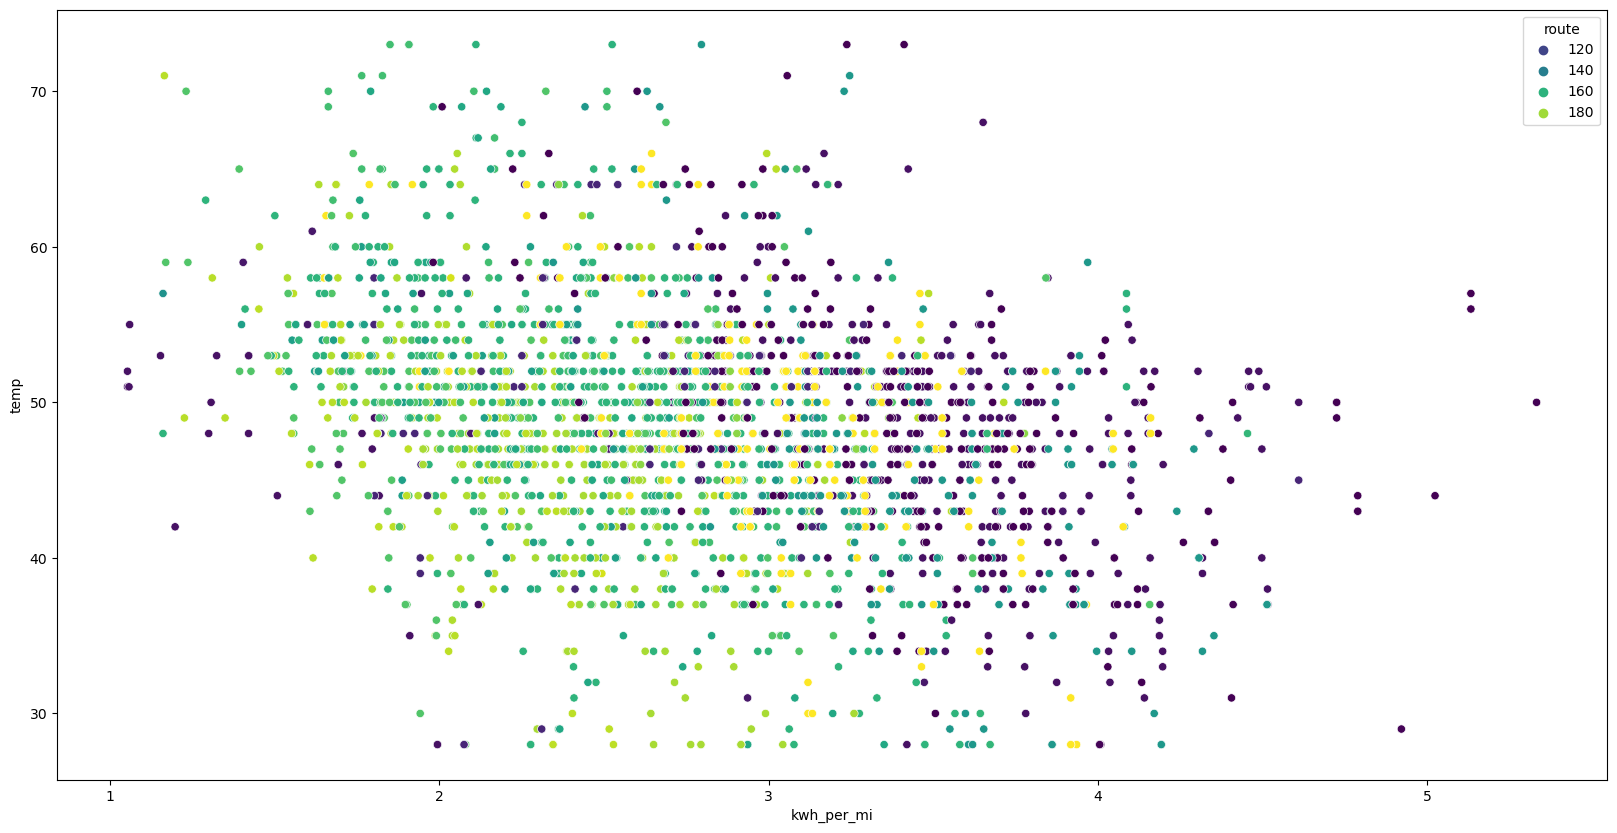

In [73]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df_w_temp,
    y='temp',
    x='kwh_per_mi',
    hue='route',
    palette='viridis', 
)
plt.show()

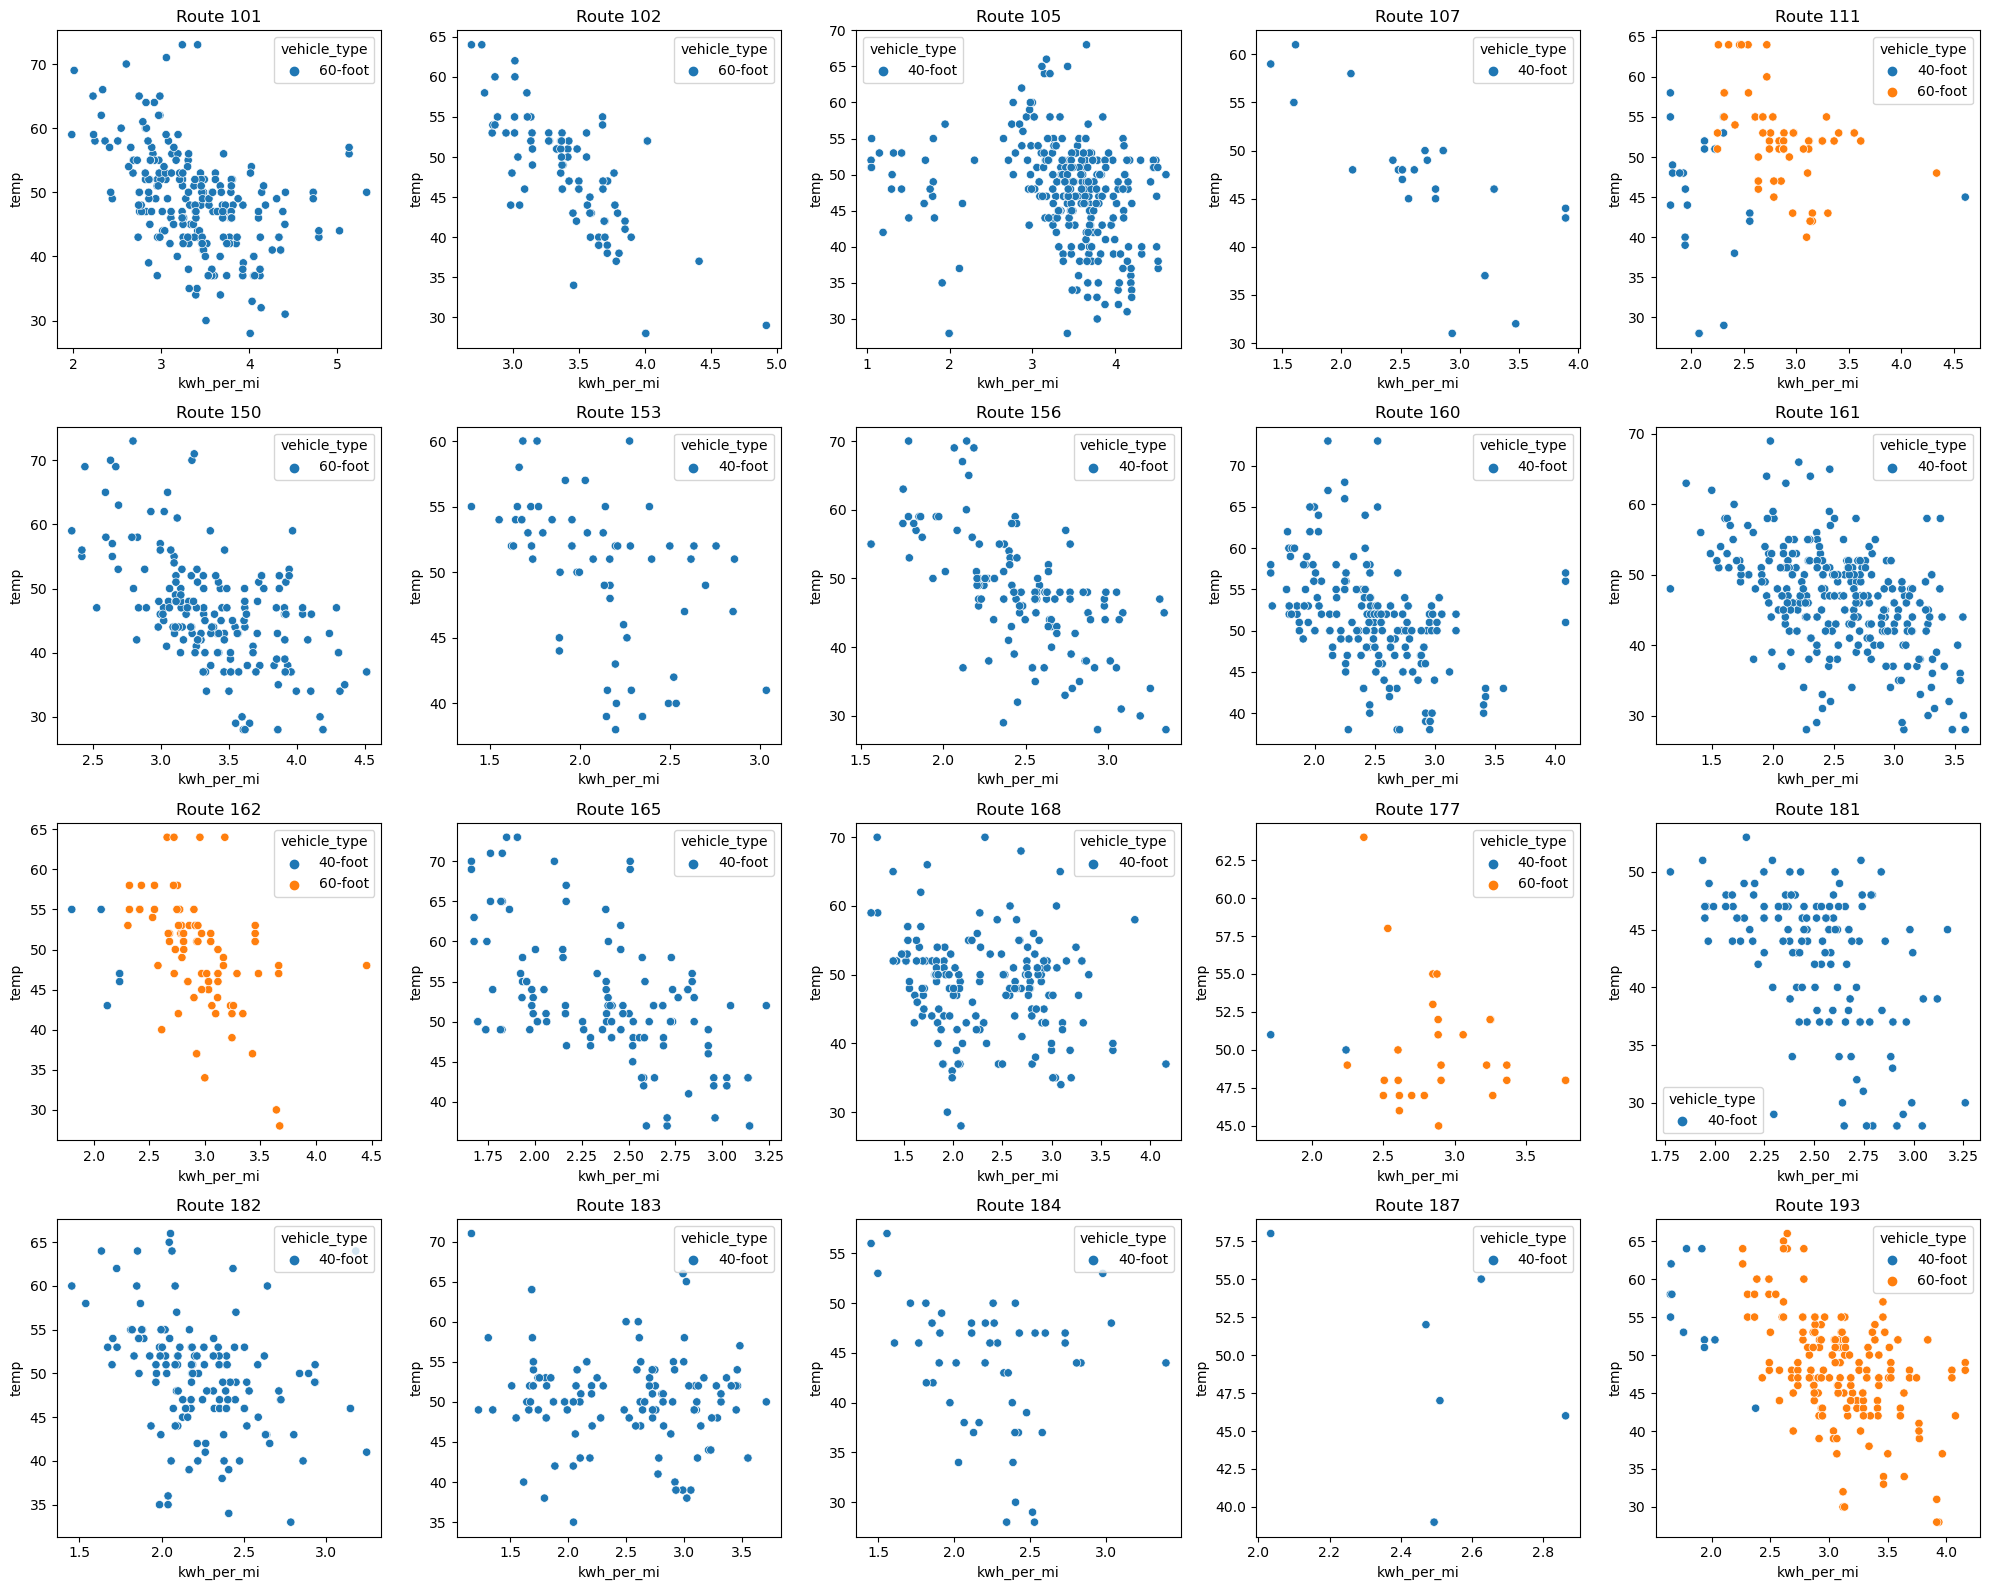

In [76]:
# Get unique routes
routes = sorted(df_w_temp['route'].unique())
routes.remove(148)
num_routes = len(routes)

# Determine the number of rows and columns for subplots
num_rows = (num_routes - 1) // 5 + 1
num_cols = min(num_routes, 5)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 16))
axes = axes.flatten()

# Loop through routes
for i, route in enumerate(routes):
    # Filter data for the current route
    route_data = df_w_temp[df_w_temp['route'] == route]
    
    # Create scatter plot for the current route
    sns.scatterplot(data=route_data, 
                    x='kwh_per_mi', 
                    y='temp', 
                    # hue='precipitation',
                    hue='vehicle_type',
                    ax=axes[i])
    axes[i].set_title(f'Route {route}')
    axes[i].set_xlabel('kwh_per_mi')
    axes[i].set_ylabel('temp')

# Hide empty subplots
for j in range(num_routes, num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()